# PCA Analysis

# Round 1: Using digits dataset


##load dataset and preprocess it

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
dataset.data.shape

(1797, 64)

In [ ]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

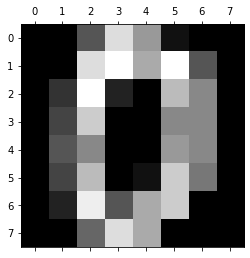

In [ ]:
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

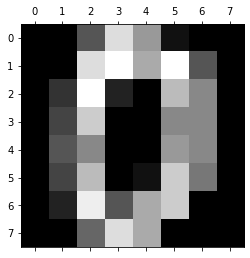

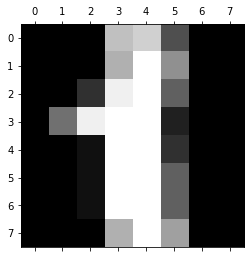

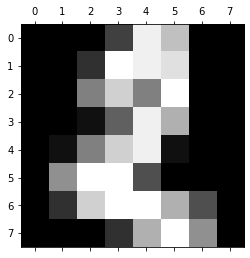

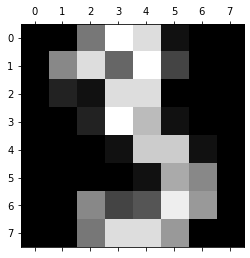

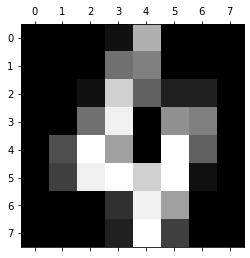

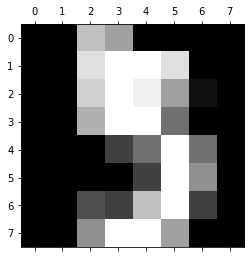

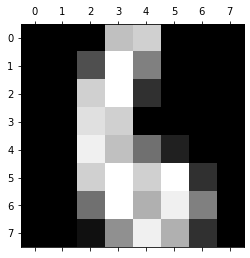

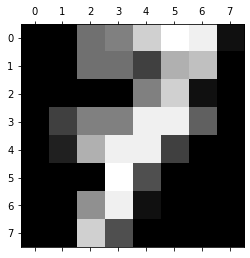

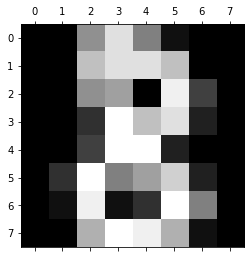

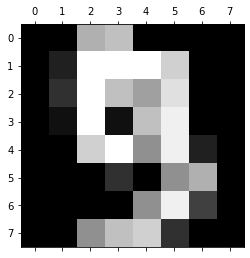

In [ ]:
for i in range(10):
  plt.matshow(dataset.data[i].reshape(8,8))

In [ ]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
X = df
y = dataset.target

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## Train a simple logistic regression classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

## Conclusion: With 100% information (64 features), we can achieve 97.2% accuracy

# Round 2: Use PCA with 0.95 for analysis

## Keep 95% information PCA for dimension deduction

In [ ]:
X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
X.shape

(1797, 64)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 40)

In [ ]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163])

In [ ]:
pca.n_components_

40

In [ ]:
X_pca

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.81405925,
         0.0249306 ,  0.32193146],
       [ 0.58898033,  0.9246358 ,  3.92475494, ...,  0.20026094,
         0.08710843, -0.48914299],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -0.214596  ,
        -1.2788745 ,  0.54583387],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ...,  0.60136463,
         0.41238798,  1.20886377],
       [ 1.07605522, -0.38090625, -2.45548693, ...,  0.43756556,
        -0.69863483, -0.44339963],
       [-1.25770233, -2.22759088,  0.28362789, ..., -0.38108638,
         0.12855104,  1.32137195]])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9638888888888889

## Conclusion, with 95% information (40 features), we achieved 96.4% accuracy.

# Round 3: Use PCA with 0.80 for analysis

## Keep 80% information PCA for dimension deduction

In [ ]:
X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
X.shape

(1797, 64)

In [ ]:
pca = PCA(0.80)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 21)

In [ ]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 ])

In [ ]:
pca.n_components_

21

In [ ]:
X_pca

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.41275404,
         0.43051695,  0.45099368],
       [ 0.58898033,  0.9246358 ,  3.92475494, ...,  0.55308473,
        -0.06967631,  0.90981832],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -1.06555601,
        -1.13345406, -0.52591658],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ..., -1.61210006,
         0.18230257,  0.16666651],
       [ 1.07605522, -0.38090625, -2.45548693, ..., -1.76918064,
         0.77471846, -0.13566828],
       [-1.25770233, -2.22759088,  0.28362789, ..., -2.43897852,
        -1.13276155, -1.11458695]])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9472222222222222

## Conclusion, with 80% information (21 features), we achieved 94.7% accuracy.

# Round 4: Use PCA with 2 features for analysis

## Keep only 2 features PCA for dimension deduction

In [ ]:
X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
X.shape

(1797, 64)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [ ]:
pca.n_components_

2

In [ ]:
X_pca

array([[ 1.91424073, -0.95439324],
       [ 0.58897815,  0.92467342],
       [ 1.30201409, -0.31731852],
       ...,
       [ 1.02261234, -0.14785558],
       [ 1.07607531, -0.38081854],
       [-1.25768733, -2.22764474]])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.5666666666666667

## Conclusion, with 2 features, we achieved 56.7% accuracy.

# Round 5: Use PCA with 10 features for analysis

## Keep 10 features PCA for dimension deduction

In [ ]:
X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
X.shape

(1797, 64)

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 10)

In [ ]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444414, 0.06498408, 0.04860031,
       0.04214069, 0.03941622, 0.03389025, 0.029981  , 0.0293009 ])

In [ ]:
pca.n_components_

10

In [ ]:
X_pca

array([[ 1.91419104, -0.95423662, -3.94596682, ...,  1.4875945 ,
         0.12958659, -0.80696961],
       [ 0.58907886,  0.92487031,  3.92502708, ...,  0.59412615,
         1.06303429,  0.01646066],
       [ 1.3020011 , -0.31734768,  3.02340561, ...,  1.15692023,
         0.78248132, -1.12782067],
       ...,
       [ 1.02278526, -0.14720481,  2.47042764, ...,  0.49576054,
         2.06471226, -1.94244605],
       [ 1.07606776, -0.38072138, -2.45549994, ...,  0.73116892,
         1.10143024, -0.22800896],
       [-1.25767195, -2.22777791,  0.2834488 , ..., -1.2334956 ,
         0.83499124, -1.77802894]])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.8805555555555555

## Conclusion, with 10 features, we achieved 88.1% accuracy.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1690e0e8-f007-4668-83e4-4e0f5a736fe7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>